#8월 16일

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치

## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의
+오차의 제곱에 대해 평균

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from random import random

In [7]:
noise = np.random.rand(100,1)


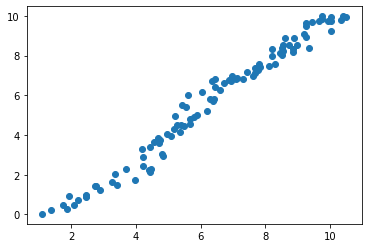

In [8]:
X = sorted(10 * np.random.rand(100,1)) + noise
Y = sorted(10 * np.random.rand(100))

plt.scatter(X,Y);

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [10]:
print("선형회귀 가중치{}".format(model.coef_))
print("편향{}". format(model.intercept_))

선형회귀 가중치[1.19029236]
편향-1.916956209741297


In [11]:
print("학습데이터 점수:", model.score(X_train,Y_train))
print("테스트 데이터 점수:", model.score(X_test,Y_test))

학습데이터 점수: 0.9763524192774132
테스트 데이터 점수: 0.9580637719697871


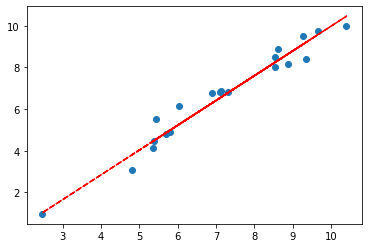

In [12]:
#예측값 구하기 sklearn 공부한것 참고 할것
predict = model.predict(X_test)

#산점도 만들기(테스트 데이터의 분포)
plt.scatter(X_test, Y_test)

#직선 만들기(학습을 통해 만들어낸 선형 모델)
#직선의 기울기 : print("선형회귀 가중치{}".format(model.coef_))
#직선의 y절편 : print("편향{}". format(model.intercept_))
plt.plot(X_test,predict,'--r')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성
+ data 는 학습해야 할 feed용 데이터를 의미합니다.
+ target은 label 데이터 이며, 예측해야 할 (class) 데이터 입니다.

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [14]:
import pandas as pd

boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
#medv를 tatget에 추가
boston_df["MEDV"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


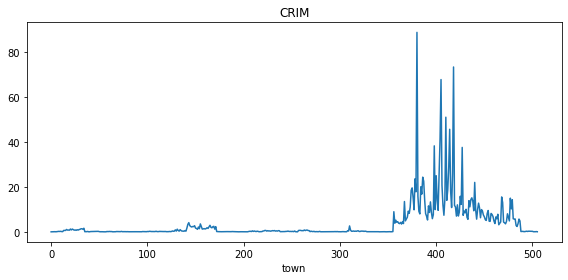

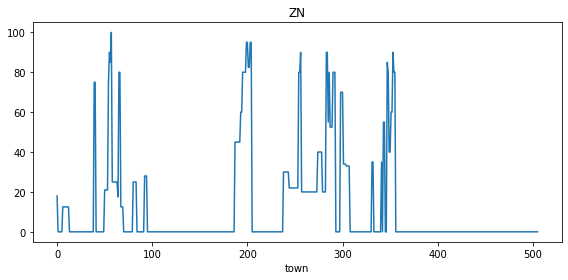

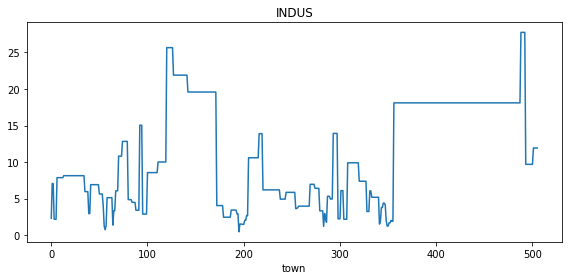

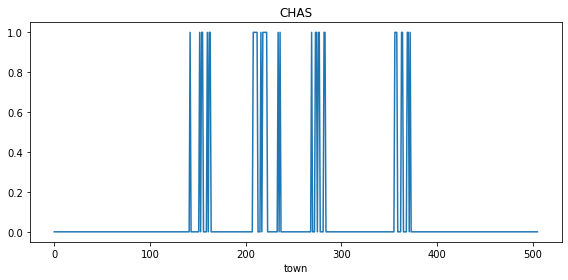

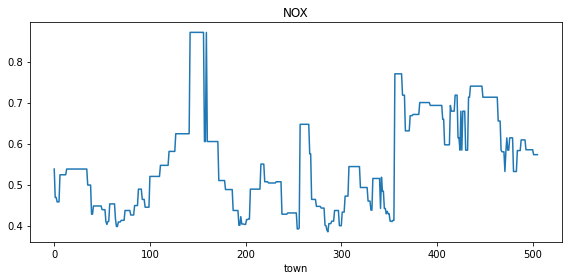

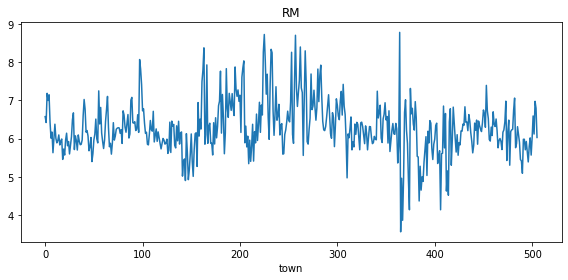

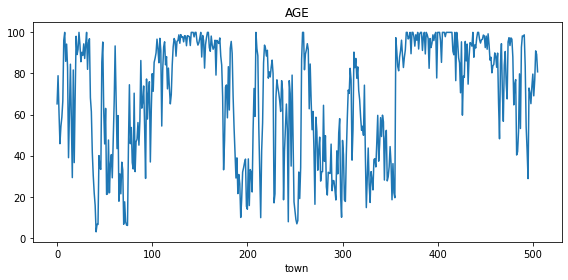

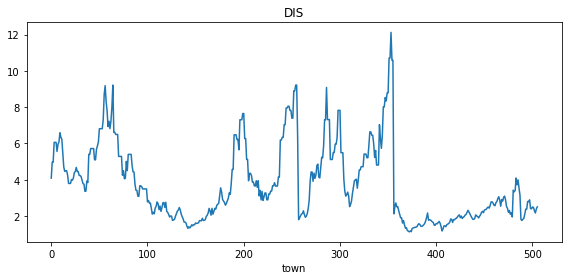

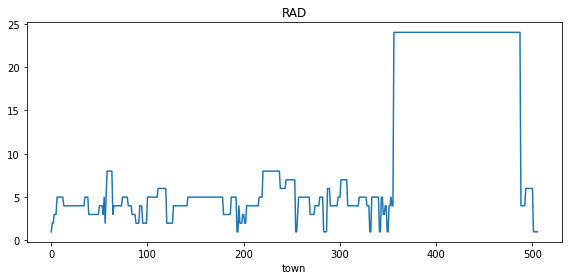

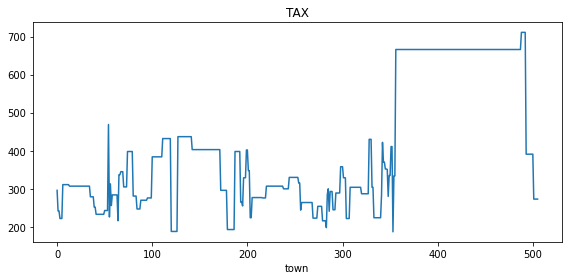

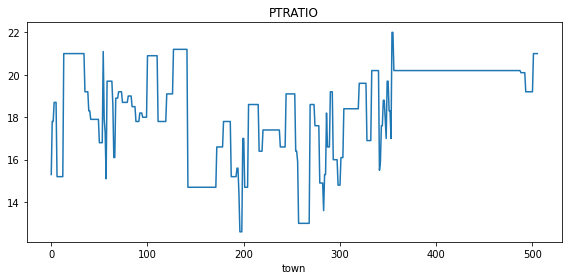

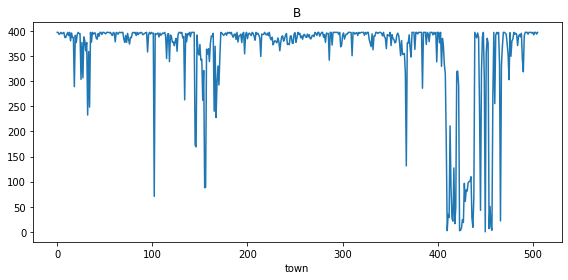

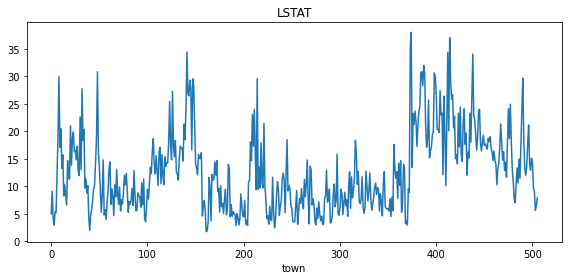

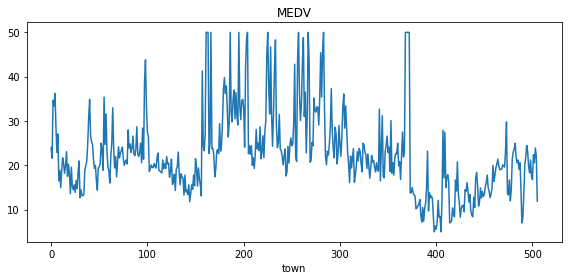

In [16]:
#모든 그래프를 시각화하자(데이터간의 상관관계 알아보기)
#enumerate함수는 리스트의 원소에 순서값을 부여해주는 함수
#순서가 있어야 차례로 그래프 구현
for i, col in enumerate(boston_df.columns):
#figsize ==> 그래프 크기  
  plt.figure(figsize = (8,4))
# boston_df의 목차를 하나씩 차트에 구현해라.
  plt.plot(boston_df[col])
#타이틀 이름도 하나씩 구현
  plt.title(col)
  plt.xlabel('town')
#서브 플롯간에 올바른 간격을 자동으로 유지합니다.
  plt.tight_layout()

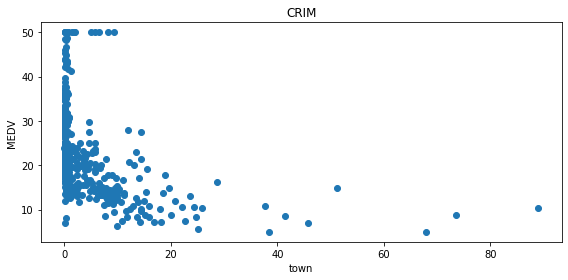

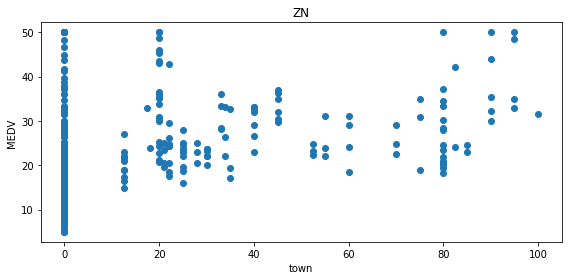

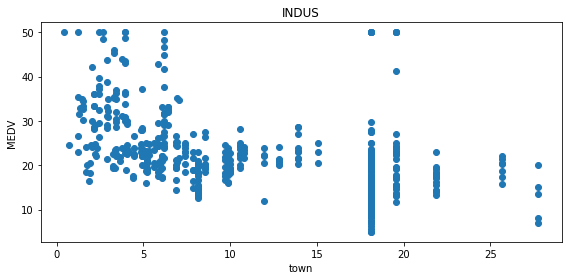

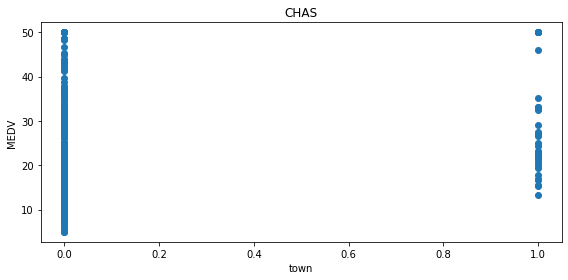

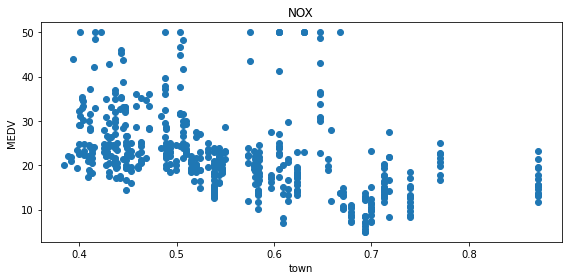

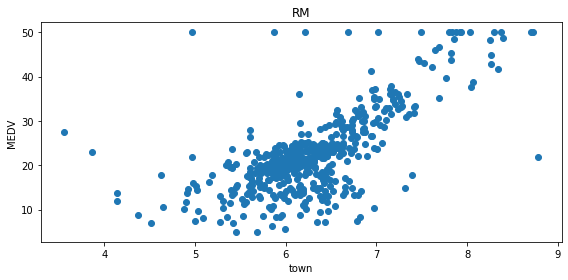

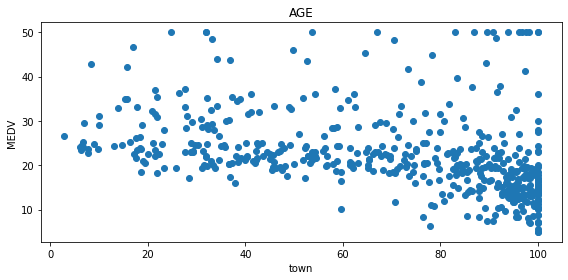

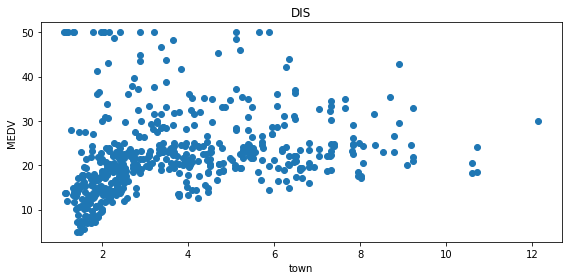

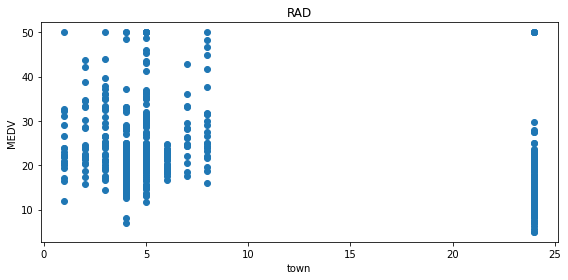

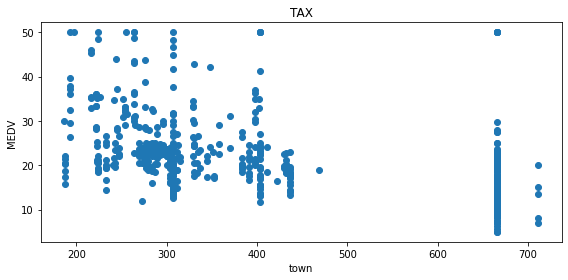

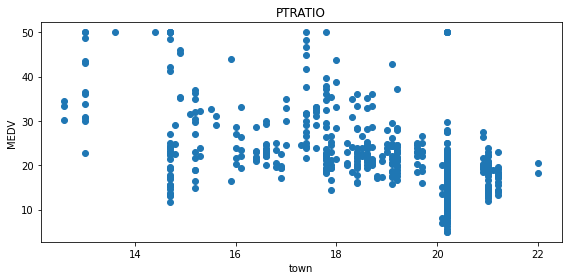

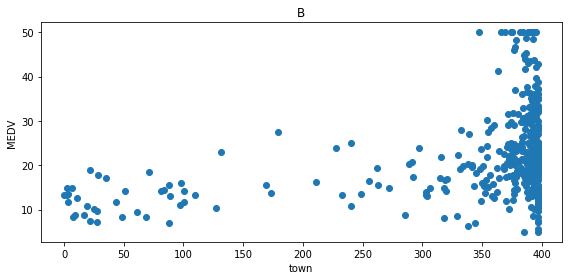

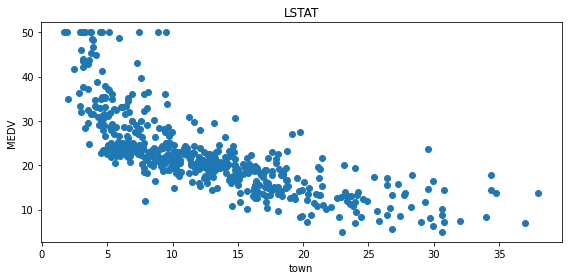

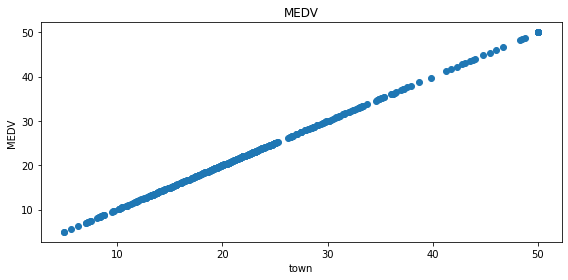

In [17]:
#모든 그래프를 시각화하자(데이터간의 상관관계 알아보기)
#특히 이제는 medv와 다른 요소들의 상관관계를 알아보는것
#enumerate함수는 리스트의 원소에 순서값을 부여해주는 함수
#순서가 있어야 차례로 그래프 구현
for i, col in enumerate(boston_df.columns):
#figsize ==> 그래프 크기  
  plt.figure(figsize = (8,4))
# boston_df의 목차를 하나씩 차트에 구현해라.
  plt.scatter(boston_df[col], boston_df['MEDV'])
#타이틀 이름도 하나씩 구현
  plt.title(col)
  plt.ylabel('MEDV')
  plt.xlabel('town')
  plt.tight_layout()

In [18]:
#모든 그래프를 시각화하자(데이터간의 상관관계 알아보기)
#모든 데이터간의 상관관계 알아보기
#싹 다 알아보기
import seaborn as sns

plt.show()

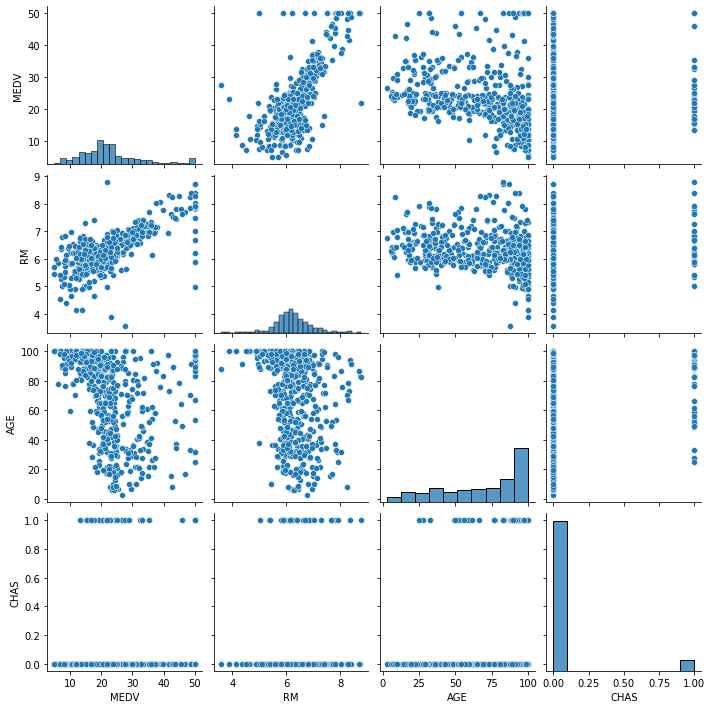

In [19]:
#비교하고싶은 데이터만 비교
sns.pairplot(boston_df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

#8월 17일

##보스턴 주택 가격에 대한 선형회귀

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(boston.data,boston.target, test_size=0.2)

model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [22]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.737707623822515
테스트 데이터 점수: 0.7261625074333675


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [23]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model,boston.data,boston.target,cv=10,scoring='neg_mean_squared_error')

print("MNSE SCORE{}:".format(score))
print("MNSE SCORE.MEAN{}:".format(score.mean()))
print("STD{}:".format(score.std()))


MNSE SCORE[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]:
MNSE SCORE.MEAN-34.70525594452486:
STD45.573999200308776:


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [24]:
r2_scores = cross_val_score(model,boston.data,boston.target,cv=10,scoring ='r2')

print("r2 scores{}:".format(r2_scores))
print("r2.MEAN {} :".format(r2_scores.mean()))
print("STD{}:".format(r2_scores.std()))

r2 scores[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]:
r2.MEAN 0.20252899006056407 :
STD0.5952960169512279:


model_selection과 sklearn.metrics의 차이

----> model_selection자체가 k-fold, train_test_split, cross_val_score()등 훈련데이터와 평가데이터로 분산해서 학습후, 평가데이터로 모델의 성능을 평가하는 것.

-----> 하지만 metrics는 테스트 데이터로 모델을 학습한 후, 평가데이터로 검증하는 것이 아니라, predict를 사용해서 검증.

생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

여기서 39.87838747704136는 bias 편향을 의미하고

-0.11632759577553525*x0 = w1 * x1부터

-0.5245817078975986*x12 = w12 * x12까지

이런 선형함수를 가지는 것



In [25]:
#선형함수
print('y= ' + str(model.intercept_) + ' ')

for i ,c in enumerate(model.coef_):
  print(str(c) + '*x' + str(i))

y= 30.783162527425837 
-0.048678267172202486*x0
0.04113470348645696*x1
0.0070444989837334625*x2
3.1303518026625063*x3
-17.803394361214956*x4
4.4267458943658475*x5
-0.0008425786392814339*x6
-1.4470667318002042*x7
0.2500674862521308*x8
-0.01072584334726075*x9
-0.9326575643233743*x10
0.011964486096012415*x11
-0.4893090972974046*x12


In [26]:
#보통 회귀에서 mean_squared_error와 r2를 자주 비교한다.
#r2값은 높을수록 좋고 rmese는 낮을수록 좋다.
#train데이터로 학습
#sklearn.metrics = 메트릭 함수 : sklearn.metrics 모듈은 특정 목적을 위해 예측 오류를 평가하는 함수,성능 평가 지표
from sklearn.metrics import mean_squared_error,r2_score

predict = model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train,predict)))
r2 = r2_score(y_train,predict)

print('rmse{}'.format(rmse))
print('r2{}'.format(r2))

rmse4.742853946852253
r20.737707623822515


In [27]:
#테스트 데이터로 작성
from sklearn.metrics import mean_squared_error,r2_score

predict = model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test,predict)))
r2 = r2_score(y_test,predict)

print('rmse{}'.format(rmse))
print('r2{}'.format(r2))

rmse4.580629164881191
r20.7261625074333675


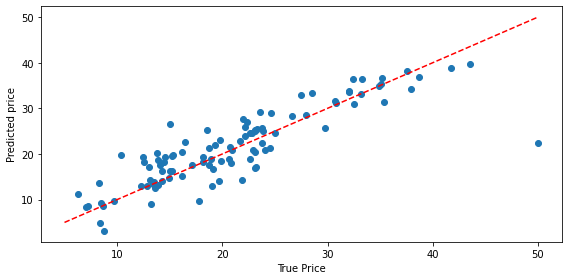

In [28]:
def plot_boston_prices(expected,predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  #MEDV 테이블의 최소가 5, 최대가 50이다.
  plt.plot([5,50],[5,50], '--r')
  plt.xlabel("True Price")
  plt.ylabel("Predicted price")
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)


### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [29]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [30]:
import pandas as pd
#target 삽입전
california_df = pd.DataFrame(california.data,columns=california.feature_names)
california_df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
#target 삽입후 target은 주택가격을 의미
california_df = pd.DataFrame(california.data,columns=california.feature_names)
california_df['target'] = california.target
california_df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
california_df.describe() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


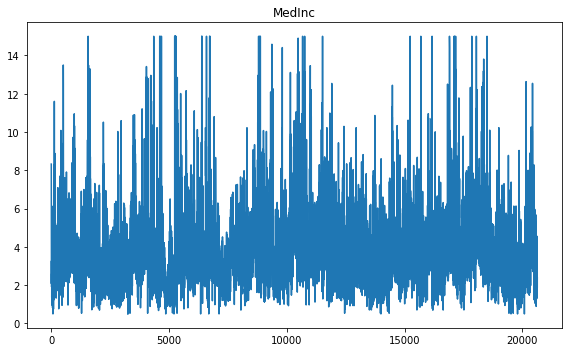

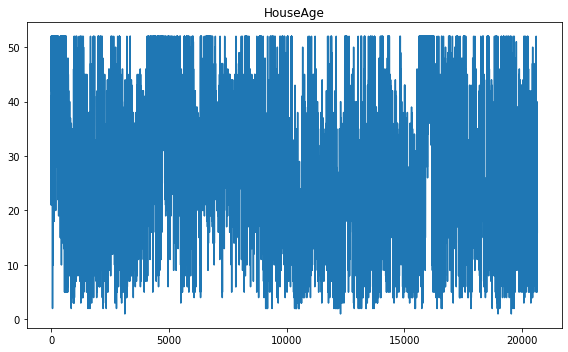

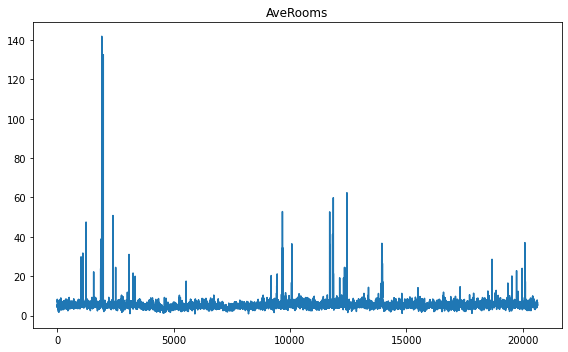

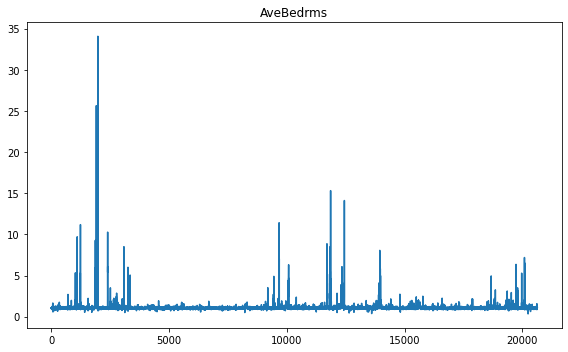

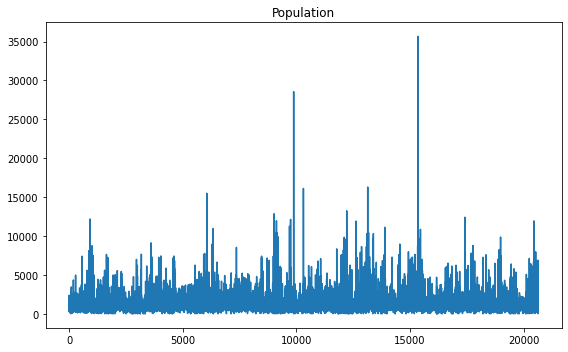

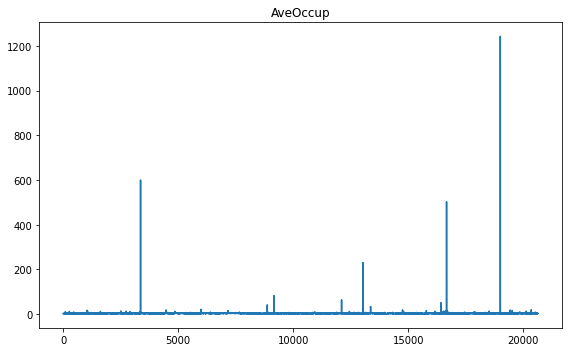

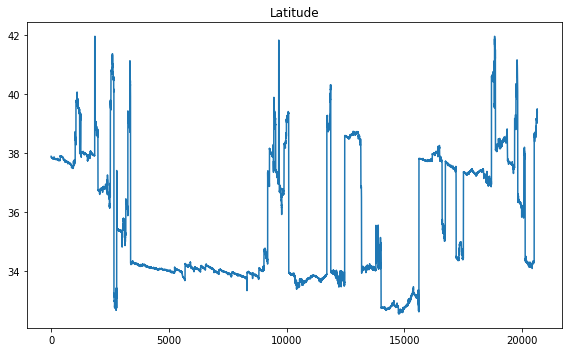

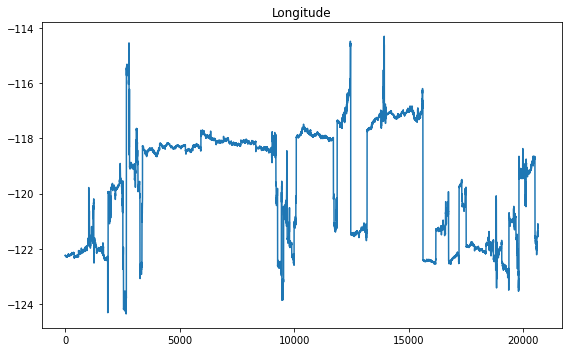

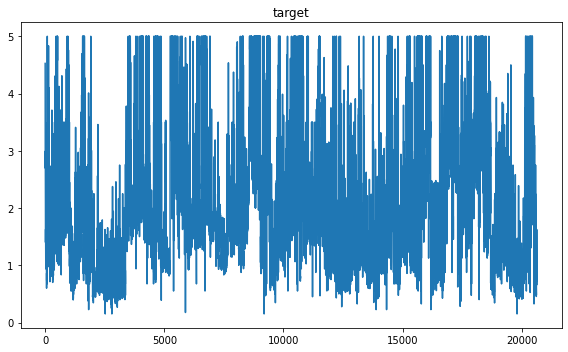

In [33]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()

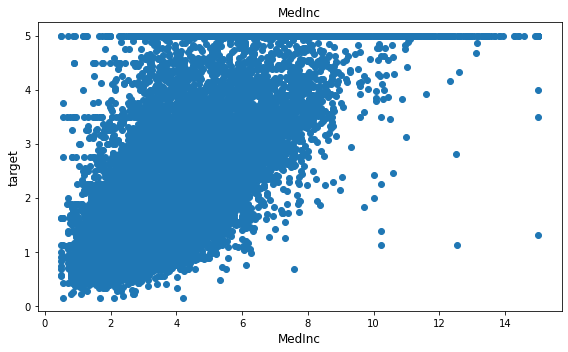

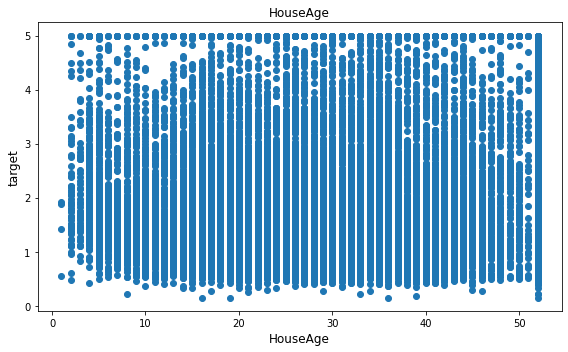

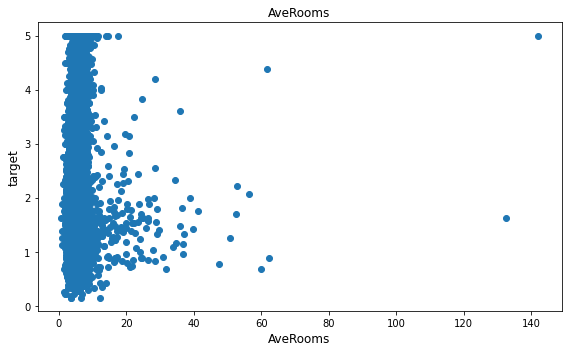

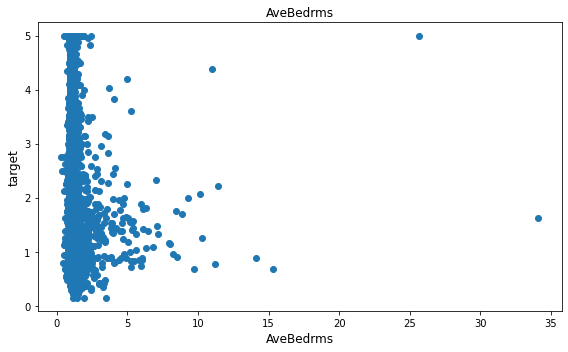

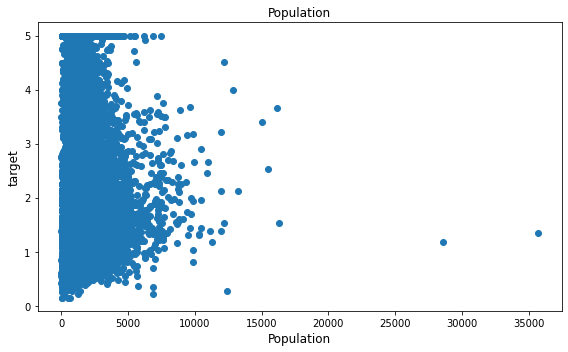

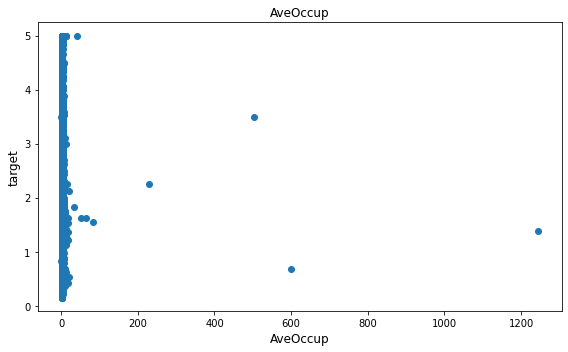

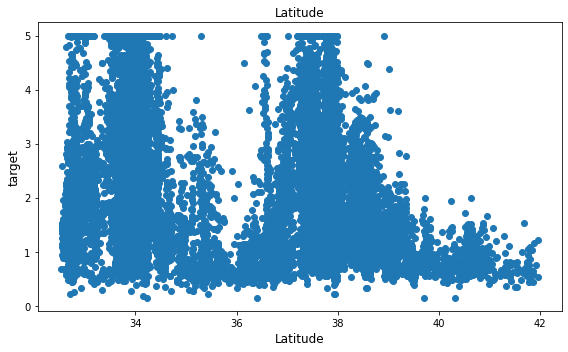

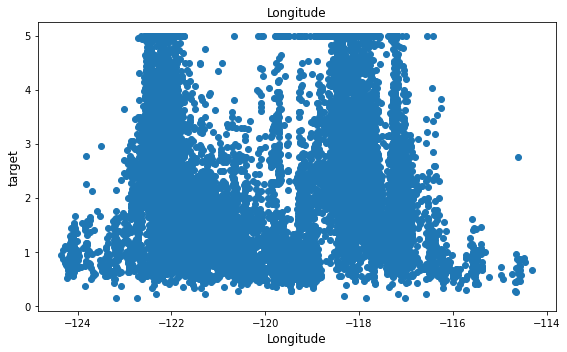

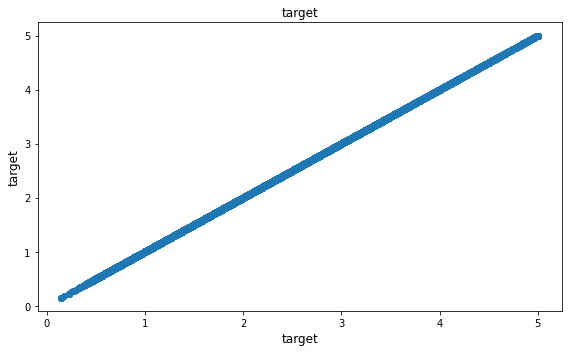

In [34]:
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.scatter(california_df[col], california_df['target'])
  plt.ylabel('target', size = 12)
  plt.xlabel(col,size = 12)
  plt.title(col, size = 12)
  plt.tight_layout()

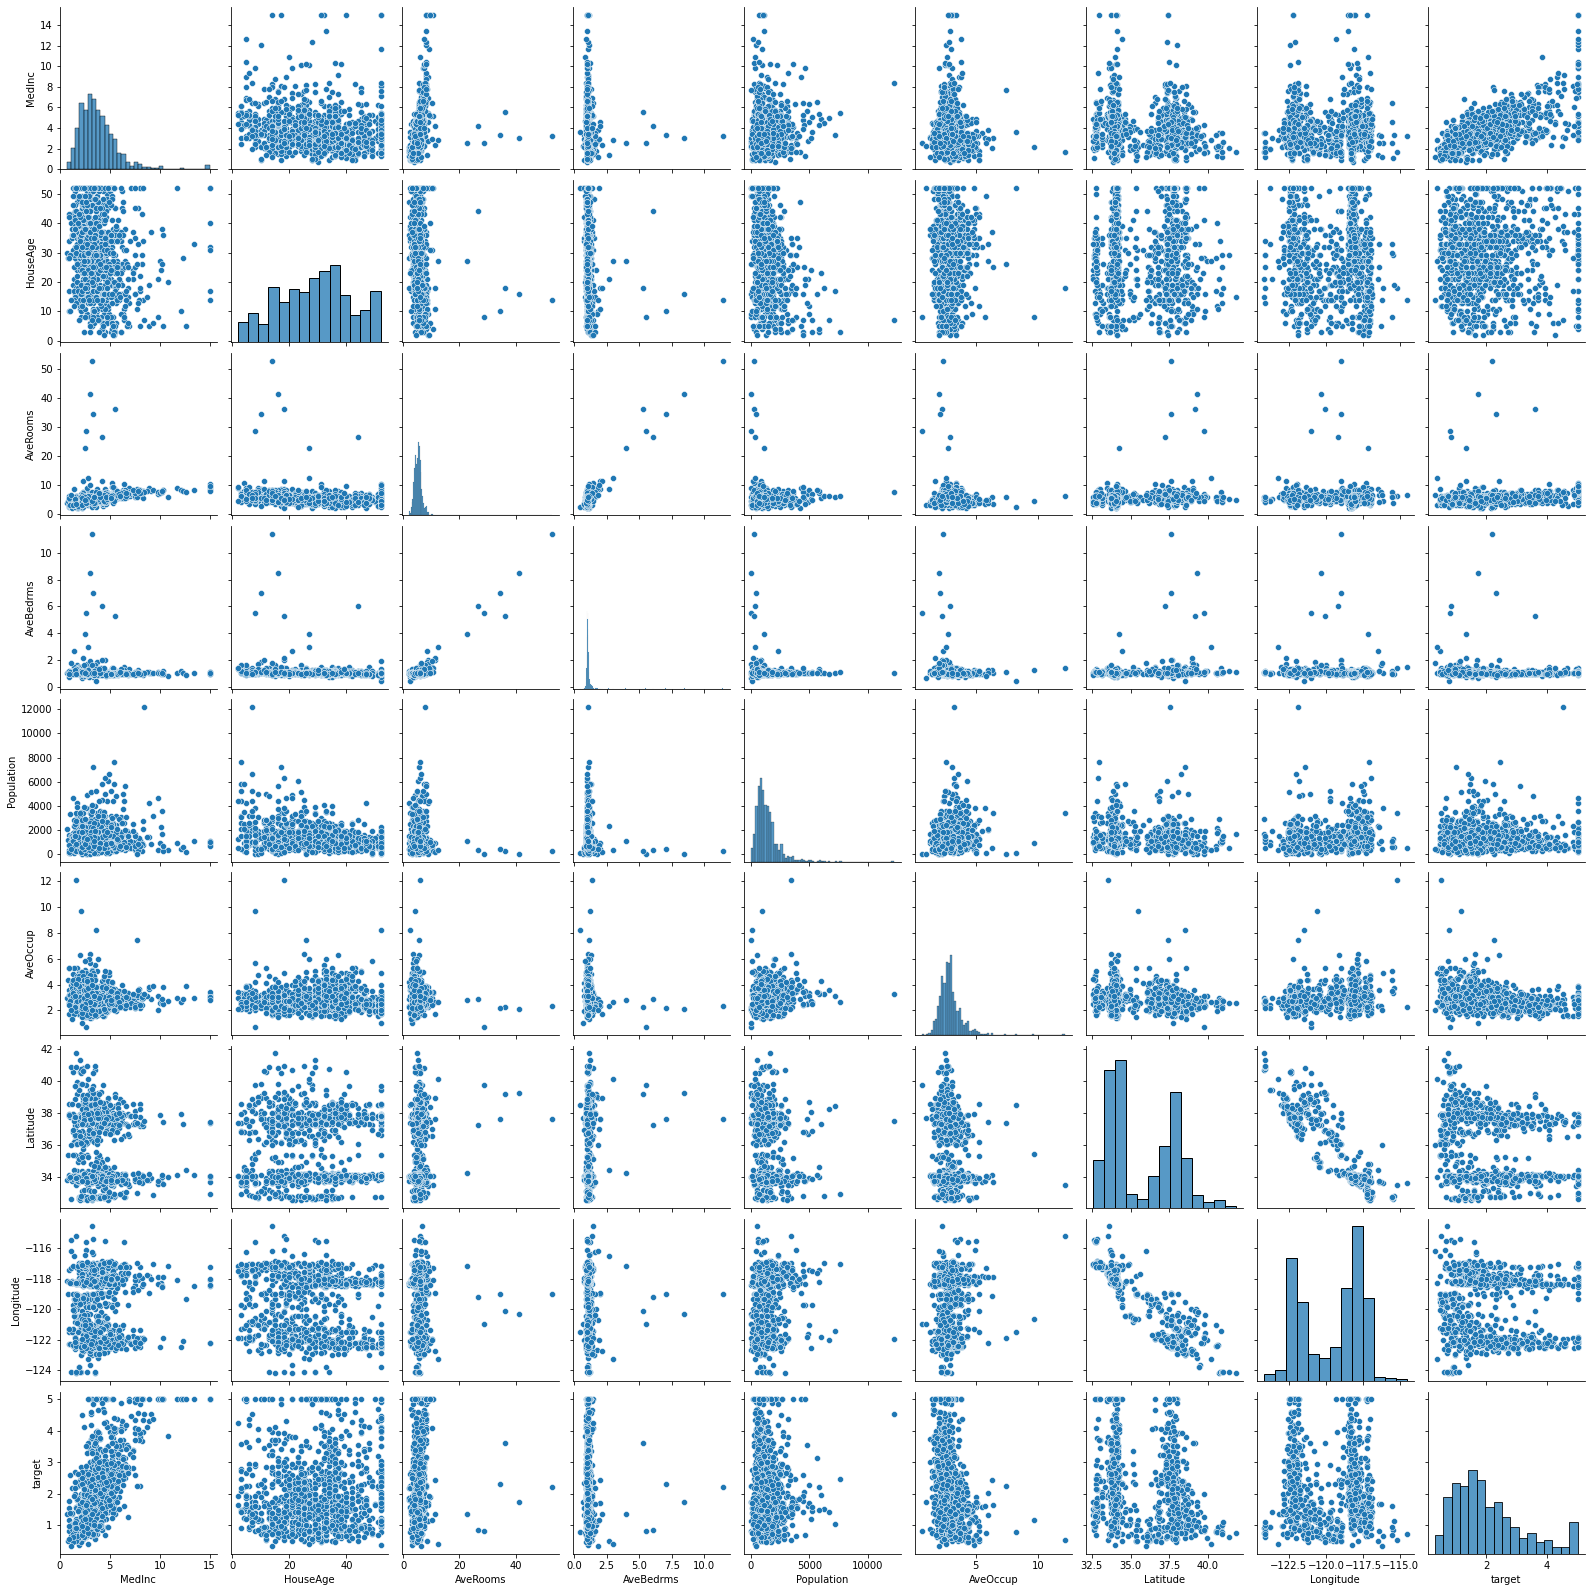

In [35]:
import seaborn as sns
#샘플로 1000개만 돌리자. 원래 데이터가 너무 크다.
sns.pairplot(california_df.sample(1000))

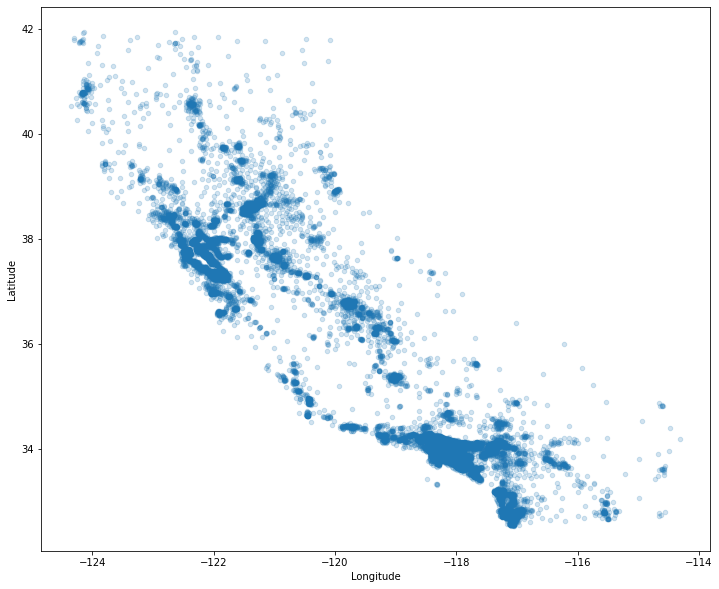

In [36]:
#위도 경도로 도시의 모습을 알 수 있다.
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha = 0.2, figsize= (12,10))

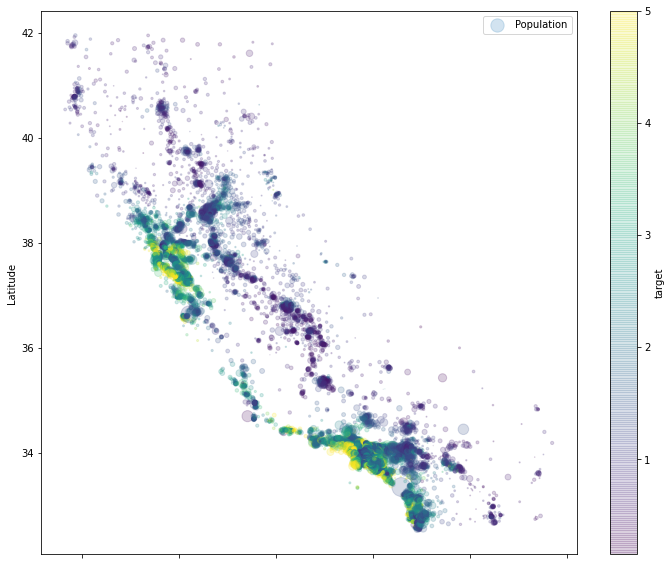

In [37]:
#위도 경도로 도시의 모습을 알 수 있다.
#보라색이 가격이 싸고 노란색에 가까울수록 가격이 비싸다.
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha = 0.2, 
                   s = california_df['Population']/100,label='Population',figsize= (12,10),
                   c = 'target', cmap = plt.get_cmap('viridis'), colorbar=True)

#8월 18일

#캘리포니아 주택가격에 대한 선형 회귀

In [38]:
model = LinearRegression(normalize=True)

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size =0.2)

model.fit(X_train,y_train)

print('학습데이터 score: {}'.format(model.score(X_train,y_train)))
print("평가데이터 score: {}".format(model.score(X_test,y_test)))

scores = cross_val_score(model,california.data,california.target,scoring='neg_mean_squared_error')
print("mse mean:{}".format(scores.mean()))
print("mse.std:{}".format(scores.std()))

r2_scores = cross_val_score(model,california.data,california.target,cv=10,scoring='r2')
print("r2 mean:{}".format(r2_scores.mean()))
print("r2.std:{}".format(r2_scores.std()))

학습데이터 score: 0.6092989796243868
평가데이터 score: 0.588793750501389
mse mean:-0.5582901717686816
mse.std:0.06560199778304081
r2 mean:0.5110068610523764
r2.std:0.05928861371262386


In [39]:
#선형함수
print('y= ' + str(model.intercept_) + ' ')

for i ,c in enumerate(model.coef_):
  print(str(c) + '*x' + str(i))

y= -37.108396695396415 
0.44147497160261767*x0
0.009828343304653042*x1
-0.11457007792819837*x2
0.7449538425919141*x3
-1.2086915647268184e-07*x4
-0.00347364093048381*x5
-0.42273690497185207*x6
-0.43545894877407304*x7


In [40]:
#보통 회귀에서 mean_squared_error와 r2를 자주 비교한다.
#r2값은 높을수록 좋고 rmese는 낮을수록 좋다.
#train데이터로 학습
from sklearn.metrics import mean_squared_error,r2_score

predict = model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train,predict)))
r2 = r2_score(y_train,predict)

print('rmse{}'.format(rmse))
print('r2{}'.format(r2))

rmse0.7243623271648634
r20.6092989796243868


In [41]:
#테스트 데이터로 작성
from sklearn.metrics import mean_squared_error,r2_score

predict = model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test,predict)))
r2 = r2_score(y_test,predict)

print('rmse{}'.format(rmse))
print('r2{}'.format(r2))

rmse0.7266929548314667
r20.588793750501389


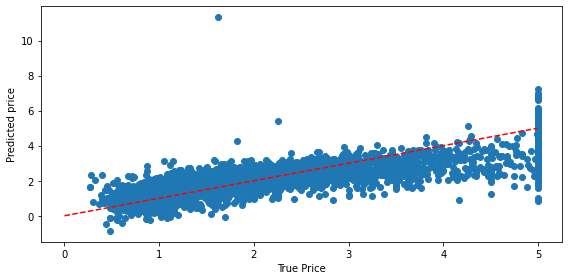

In [42]:
def plot_california_prices(expected,predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  #target 테이블의 최소가 5, 최대가 50이다.
  plt.plot([0,5],[0,5], '--r')
  plt.xlabel("True Price")
  plt.ylabel("Predicted price")
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
+훈련 세트 점수가 테스트 점수에 비해 점수차이가 크면 과대적합의 예시라 할 수 있다.
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}
+ 즉 mese를 구한 값에 알파값으로 사용자가 지정한 하이퍼파라미터를 통해 규제를 할 수 있다.
  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

In [43]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [44]:
#boston 데이터를 데이터냐 타겟이냐 형태로 자동으로 구분 시켜주는 함수
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [45]:
model = Ridge(alpha=0.1)
model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [46]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.7431229114782789
테스트 데이터 점수: 0.7096991685228993


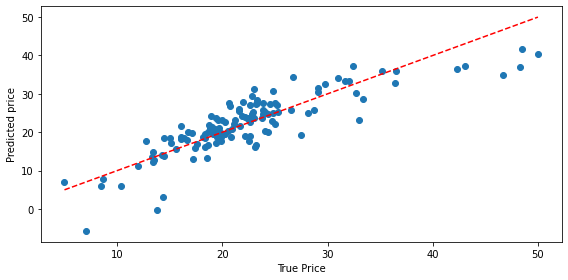

In [47]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

##캘리포나이 릿지

In [48]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size =0.2)

In [49]:
model = Ridge(alpha=0.1)
model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [50]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.60310587742105
테스트 데이터 점수: 0.6186267380841497


## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

In [51]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [52]:
#boston 데이터를 데이터냐 타겟이냐 형태로 자동으로 구분 시켜주는 함수
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [53]:
model = Lasso(alpha=0.001)
model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [54]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.753291437843179
테스트 데이터 점수: 0.6846096454607169


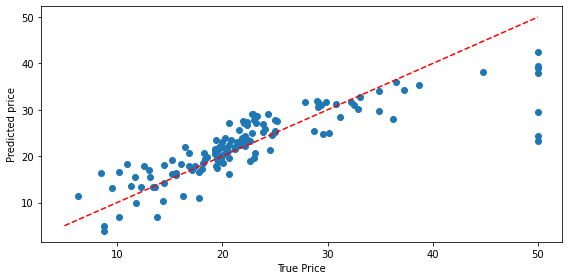

In [55]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

#캘리포니아 랏소

In [56]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size =0.2)

In [57]:
model = Lasso(alpha=0.001)
model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [58]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.6064699258678723
테스트 데이터 점수: 0.6015413983704998


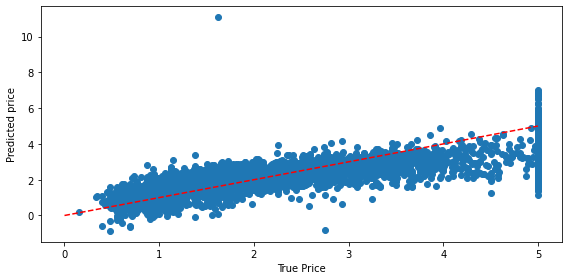

In [59]:
#라쏘회귀 데이터 구현
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

#보스턴 데이터 신축망

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [61]:
#boston 데이터를 데이터냐 타겟이냐 형태로 자동으로 구분 시켜주는 함수
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [62]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5)
model.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [63]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.7436074116678122
테스트 데이터 점수: 0.6610242039755838


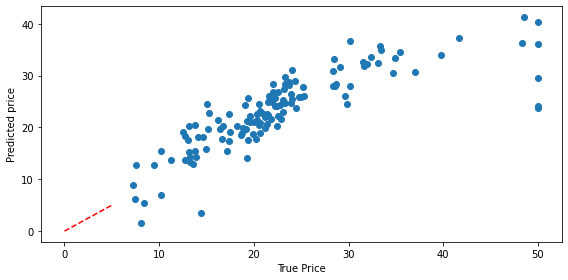

In [64]:
#신축망 데이터 구현
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

#캘리포니아 데이터 신축망

In [65]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size =0.2)

In [66]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5)
model.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [67]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.5739939096934266
테스트 데이터 점수: 0.5839645756731765


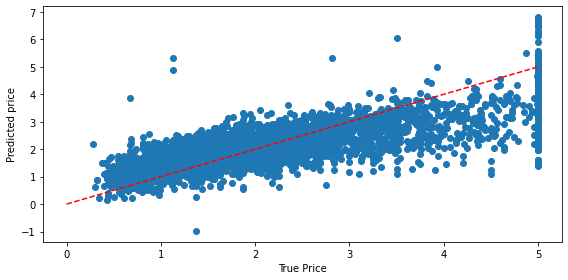

In [68]:
#신축망 데이터 구현
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

#다항 회귀

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)

#보스턴 주택 가격에 대한 다항 회귀

In [69]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [70]:
#boston 데이터를 데이터냐 타겟이냐 형태로 자동으로 구분 시켜주는 함수
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [71]:

model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [72]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.9355838982853919
테스트 데이터 점수: 0.7533183231692375


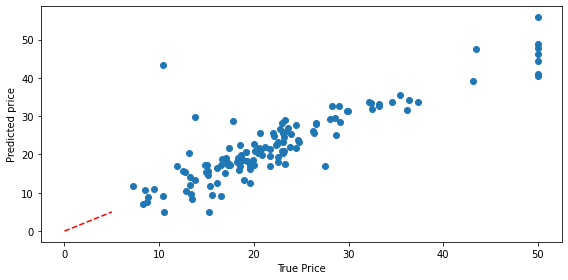

In [73]:

predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

#캘리포니아에 대한 다항 회귀

In [74]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size =0.2)

In [75]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [76]:
print("학습데이터 점수:", model.score(X_train,y_train))
print("테스트 데이터 점수:", model.score(X_test,y_test))

학습데이터 점수: 0.6839307297389683
테스트 데이터 점수: 0.663669075200076


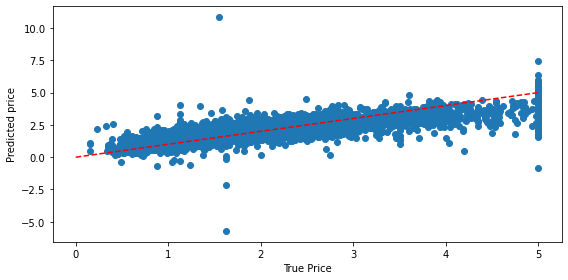

In [77]:

predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)